# Random Forest Classifier

In [62]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn import set_config
set_config(display='diagram')

In [63]:
t_df = pd.read_csv('/Users/mahmoud/Documents/Project_3/test.csv')

t_df.head()

,Unnamed: 0,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,2360,IN,68,415,386-9724,no,no,0,222.1,107,...,102,16.95,162.4,107,7.31,9.4,3,2.54,2,False
1,600,MI,102,510,336-4656,no,no,0,102.6,89,...,77,20.91,170.5,140,7.67,9.1,4,2.46,2,False
2,1501,AZ,72,510,407-9830,no,no,0,272.4,88,...,125,9.17,185.5,81,8.35,12.7,2,3.43,0,False
3,1114,TN,108,408,352-1127,no,yes,15,165.1,85,...,93,22.70,250.7,114,11.28,10.9,4,2.94,1,False
4,517,OK,52,408,389-4780,no,no,0,214.7,68,...,138,13.48,123.4,114,5.55,9.4,4,2.54,2,False


In [103]:
test_df = pd.read_csv('/Users/mahmoud/Documents/Project_3/test.csv')

test_df.shape

(334, 22)

In [104]:
train_df = pd.read_csv('/Users/mahmoud/Documents/Project_3/train.csv')

train_df.shape

(2999, 22)

In [105]:
test_df = test_df.drop(columns=['Unnamed: 0'])
train_df = train_df.drop(columns=['Unnamed: 0'])

In [106]:
X = train_df.drop(['churn'], axis = 1)
y = train_df['churn']


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 42)

In [108]:
# numeric columns + drop phone #
X_tr_num = X_train.drop(['state', 'area code', 'phone number', 'international plan', 'voice mail plan'], axis=1)
X_tr_num

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
93,142,0,140.8,140,23.94,228.6,119,19.43,152.9,88,6.88,10.9,7,2.94,1
419,135,0,201.8,81,34.31,225.0,114,19.13,204.4,82,9.20,10.3,6,2.78,1
2907,134,32,216.8,78,36.86,102.2,111,8.69,174.0,83,7.83,8.6,2,2.32,0
2525,103,36,87.2,92,14.82,169.3,110,14.39,166.7,80,7.50,10.9,5,2.94,6
2592,92,29,201.3,130,34.22,203.7,115,17.31,129.9,113,5.85,6.4,6,1.73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,65,29,158.1,104,26.88,322.2,81,27.39,210.0,96,9.45,8.9,6,2.40,1
683,55,25,165.6,123,28.15,136.1,95,11.57,175.7,90,7.91,11.0,2,2.97,3
2688,103,0,246.5,47,41.91,195.5,84,16.62,200.5,96,9.02,11.7,4,3.16,1
2687,80,0,189.1,122,32.15,223.2,92,18.97,269.0,116,12.11,13.9,3,3.75,2


In [109]:
# doing the same for X test
X_te_num = X_test.drop(['state', 'area code', 'phone number', 'international plan', 'voice mail plan'], axis=1)

In [110]:
y_train.value_counts()

False    1927
True      322
Name: churn, dtype: int64

In [111]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

steps = [('std_scaler', StandardScaler()), ("SMOTE", SMOTE()),
        ('rf_clf', RandomForestClassifier(random_state=42))]
# smote has no affect
pipeline = Pipeline(steps)


pipeline

Pipeline(steps=[('std_scaler', StandardScaler()), ('SMOTE', SMOTE()),
                ('rf_clf', RandomForestClassifier(random_state=42))])

In [112]:
# Train the pipeline (tranformations & predictor)
pipeline.fit(X_tr_num, y_train)

# Predict using the pipeline (includes the transfomers & trained predictor)
predicted = pipeline.predict(X_te_num)

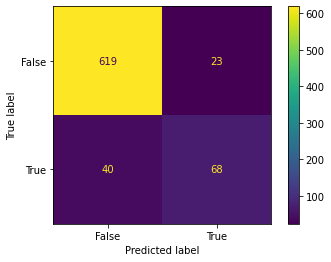

In [113]:
plot_confusion_matrix(pipeline,X_te_num,y_test)

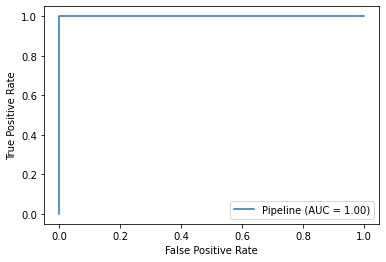

In [114]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
plot_roc_curve(pipeline,X_tr_num,y_train)

In [115]:
print(pipeline.score(X_tr_num, y_train))

1.0


In [116]:
print(pipeline.score(X_te_num, y_test))

0.916


In [117]:
pipeline.named_steps['rf_clf'].feature_importances_

array([0.0375519 , 0.05090532, 0.11912668, 0.03608972, 0.13357348,
       0.05906374, 0.04052506, 0.05696337, 0.04060998, 0.03877154,
       0.04010542, 0.04220216, 0.08547556, 0.04484541, 0.17419067])

# slight overfit